In [206]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import requests

from webdriver_manager.chrome import ChromeDriverManager

import pandas as pd
import os, glob

from plotnine import *
from sklearn.feature_extraction.text import CountVectorizer

## Step1: scrape the five tea shops that I visited in NYC

### Method 1.1 save five csvs and merge them together

In [ ]:
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get('https://www.yelp.com/menu/yi-fang-taiwan-fruit-tea-flushing')
menu_item = [item.text for item in driver.find_elements(By.TAG_NAME,'h4')]
menu_price = [price.text for price in driver.find_elements(By.CLASS_NAME,'menu-item-price-amount')]
df = pd.DataFrame(list(zip(menu_item, menu_price)), columns =['item', 'price']) 
df['name'] = 'YiFang'
df.to_csv('yifang.csv',index=False)

In [ ]:
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get('https://www.yelp.com/menu/i-milky-%E6%B2%90%E7%99%BD-new-york-3')
menu_item = [item.text for item in driver.find_elements(By.TAG_NAME,'h4')]
menu_price = [price.text for price in driver.find_elements(By.CLASS_NAME,'menu-item-price-amount')]
df = pd.DataFrame(list(zip(menu_item, menu_price)), columns =['item', 'price']) 
df['name'] = 'IMilky'
df.to_csv('imilky.csv',index=False)

In [ ]:
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get('https://www.yelp.com/menu/gong-cha-new-york-25')
menu_item = [item.text for item in driver.find_elements(By.TAG_NAME,'h4')]
menu_price = [price.text for price in driver.find_elements(By.CLASS_NAME,'menu-item-price-amount')]
df = pd.DataFrame(list(zip(menu_item, menu_price)), columns =['item', 'price']) 
df['name'] = 'GongCha'
df.to_csv('gongcha.csv',index=False)

In [ ]:
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get('https://www.yelp.com/menu/xing-fu-tang-new-york')
menu_item = [item.text for item in driver.find_elements(By.TAG_NAME,'h4')]
menu_price = [price.text for price in driver.find_elements(By.CLASS_NAME,'menu-item-price-amount')]
df = pd.DataFrame(list(zip(menu_item, menu_price)), columns =['item', 'price']) 
df['name'] = 'XingFuTang'
df.to_csv('xingfutang.csv',index=False)

In [ ]:
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get('https://www.yelp.com/menu/shiny-tea-new-york')
menu_item = [item.text for item in driver.find_elements(By.TAG_NAME,'h4')]
menu_price = [price.text for price in driver.find_elements(By.CLASS_NAME,'menu-item-price-amount')]
df = pd.DataFrame(list(zip(menu_item, menu_price)), columns =['item', 'price']) 
df['name'] = 'ShinyTea'
df.to_csv('shinytea.csv',index=False)

#### Yes, this is a very stupid method. But since I have to keep my project move on, I just did that and merge all five together :)

In [ ]:
path = "/Users/angeline_jcq/Desktop/ColumbiaJ/Spring/Studio/menu_newyork"
all_files = glob.glob(os.path.join(path, "*.csv"))
df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
df_merged   = pd.concat(df_from_each_file, ignore_index=True)
df_merged.to_csv("bubble-tea-us.csv",index=False)

### Method 1.2: using for-loop to scrape all at once

#### Now I am succussful using for-loop to save energy!

In [ ]:
menu_list = [{'brand':'ShinyTea','link':'https://www.yelp.com/menu/shiny-tea-new-york'}, 
             {'brand':'XingFuTang','link':'https://www.yelp.com/menu/xing-fu-tang-new-york'},
             {'brand':'YiFang','link':'https://www.yelp.com/menu/yi-fang-taiwan-fruit-tea-flushing'},
             {'brand':'IMilky','link':'https://www.yelp.com/menu/i-milky-%E6%B2%90%E7%99%BD-new-york-3'},
             {'brand':'GongCha','link':'https://www.yelp.com/menu/gong-cha-new-york-25'}]

In [ ]:
menu_all = []
driver = webdriver.Chrome(ChromeDriverManager().install())
for menu in menu_list:
    driver.get(menu['link'])
    soup_doc = BeautifulSoup(driver.page_source)   
    items = soup_doc.find_all(class_="menu-item")
    for item in items:
        one_item = {}
        try:
            one_item['item'] = item.find('h4').get_text(strip=True)
        except:
            print("No name")
        try:
            one_item['price'] = item.find(class_='menu-item-price-amount').get_text(strip=True)
        except:
            print("No price")
        one_item['name'] = menu['brand']
        menu_all.append(one_item)

driver.close()
menu_all

## Step 2: get a clear dataframe

In [57]:
df_cn = pd.read_excel("bubble-tea-cn.xlsx")
df_us = pd.read_csv("bubble-tea-us.csv")

In [236]:
df_cn.shape

(144, 8)

In [237]:
df_us.shape

(292, 8)

### 2.1 Clean the Chinese bubble tea dataset

In [58]:
df_cn['item']=df_cn['item-en']
# fill all drinks that don't have large size with the median price
df_cn['price(L)']=df_cn['price(L)'].fillna(df_cn['price(M)'])
# get the final price ($1 = ￥6.4)
df_cn['price']=(df_cn['price(M)']+df_cn['price(L)'])/2/6.4
df_cn['price'] = df_cn['price'].astype(float).round(2)
# get rid of some columns
df_cn.drop(columns=['item-cn', 'item-en','price(M)','price(L)'],inplace=True)

### 2.2 Clean the US bubble tea dataset

In [59]:
df_us.price = df_us.price.str.replace("$","").astype(float).round(2)
df_us['country']='US'

/var/folders/9m/w7ffkstj051dnyjnyklwvwmr0000gn/T/ipykernel_92168/2118947250.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_us.price = df_us.price.str.replace("$","").astype(float).round(2)


In [60]:
frames = [df_cn, df_us]
result = pd.concat(frames)
result

,name,base-drink,topping,fruit,type,country,item,price
0,HeyTea,green tea,cheese foam,NaN,cheese tea,China,cheezo/light cheezo aqua green,2.19
1,HeyTea,green tea,NaN,NaN,tea,China,aqua green,1.41
2,HeyTea,milk; green tea,NaN,NaN,milk tea,China,aqua green milk tea,2.03
3,HeyTea,oolong tea,cheese foam,NaN,cheese tea,China,king fone cheese tea,2.81
4,HeyTea,oolong tea,NaN,NaN,tea,China,king fone,2.03
...,...,...,...,...,...,...,...,...
287,IMilky,coffee;milk,bubble;brown sugar,NaN,milk,US,Brown Sugar Bubble Coffee Milk (M),7.74
288,IMilky,milk;coffee,brown sugar,NaN,coffee,US,Brown Sugar Coffee Latte (M),7.14
289,IMilky,milk;coffee,caramel,NaN,coffee,US,Caramel Macchiato (M),7.14
290,IMilky,milk;coffee,NaN,NaN,coffee,US,Coffee Latte (M),6.60


In [61]:
result.to_csv("bubble-tea-df.csv",index=False)

## Step  3: Analysis and visualizations

I fix some tiny issues (two drinks' prices are missing because they only have large sizes; and typos) manually. It's not worth to change any code. So I will do read_csv again.

In [207]:
df = pd.read_csv("bubble-tea-df.csv")
df.head()

,name,base-drink,topping,fruit,type,country,item,price
0,HeyTea,green tea,cheese foam,NaN,cheese tea,China,cheezo/light cheezo aqua green,2.19
1,HeyTea,green tea,NaN,NaN,tea,China,aqua green,1.41
2,HeyTea,milk;green tea,NaN,NaN,milk tea,China,aqua green milk tea,2.03
3,HeyTea,oolong tea,cheese foam,NaN,cheese tea,China,king fone cheese tea,2.81
4,HeyTea,oolong tea,NaN,NaN,tea,China,king fone,2.03


### Idea 1: price distribution by type of drinks

In [208]:
df.type.value_counts()

milk tea      130
fruit tea      84
tea            80
milk           46
cheese tea     23
coffee         18
lemonade       16
cocoa           9
slush           9
matcha          7
yogurt          6
water           4
juice           2
yakult          1
soda            1
Name: type, dtype: int64

In [209]:
types = ['milk tea','fruit tea','tea','milk','cheese tea','coffee','lemonade']
type_filter = df[df.type.isin(types)]

In [210]:
china = df[df.country=='China']
china.price.median()

2.54

In [238]:
china.price.describe()

count    144.000000
mean       2.761597
std        0.982459
min        1.250000
25%        2.090000
50%        2.540000
75%        3.440000
max        5.160000
Name: price, dtype: float64

In [211]:
us = df[df.country=='US']
us.price.median()

5.859999999999999

In [239]:
us.price.describe()

count    292.000000
mean       6.092295
std        1.477765
min        3.750000
25%        5.000000
50%        5.860000
75%        7.155000
max       10.000000
Name: price, dtype: float64

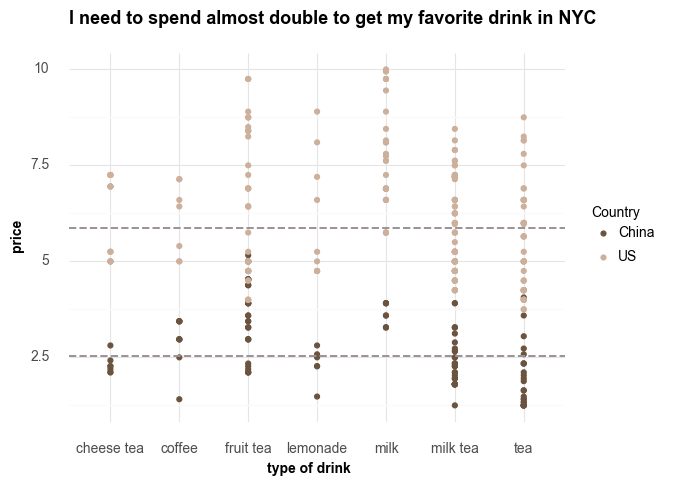

<ggplot: (315068862)>

In [240]:
p = (ggplot(type_filter, aes(x='type', y='price'))          
        + geom_point(aes(color='country'))
        + geom_hline(yintercept=2.54,size=0.8,linetype="dashed",color='#9C9298')
        + geom_hline(yintercept=5.86,size=0.8,linetype="dashed",color='#9C9298')
        + labs(
            title = "I need to spend almost double to get my favorite drink in NYC",
            x = "type of drink",
            y = "price",
            color = 'Country'
        )
        + scale_color_manual(values=("#6B543F","#CDB09C"))
        + theme_minimal()
        + theme(
            text = element_text(family='Arial',size=10),
            axis_title = element_text(face='bold'),
            axis_text = element_text(size=10),
            plot_title = element_text(face='bold', size=13, ha='left', x=0.125, y=0.95),
        )

)   
display(p)

In [241]:
p.save('vis-1.png',dpi=1000)

/Users/angeline_jcq/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/angeline_jcq/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: vis-1.png


### Idea 2: common base drink and topping

In [215]:
df['base-drink'] = df['base-drink'].str.replace("; ",";")

In [216]:
base_drinks = list(df['base-drink'].dropna().str.split(";").explode().unique())
base_drinks

['green tea',
 'milk',
 'oolong tea',
 'black tea',
 'coffee',
 'oat milk',
 'thai tea',
 'matcha',
 'cocoa',
 'coconut milk',
 'sea salt water',
 'jasmine tea',
 'yakult',
 'lemonade',
 'water',
 'pu-er tea',
 'jujube',
 'wintermelon tea',
 'vinegar',
 'ginger',
 'rose tea',
 'soda',
 'sparkling',
 'earl grey',
 'chai tea',
 'yogurt',
 'barley tea',
 'soy milk']

In [217]:
counts = []
for base_drink in base_drinks:
    bd = df['base-drink'].str.contains(base_drink).value_counts().to_dict()
    bd['drink'] = base_drink
    counts.append(bd)
counts

[{False: 328, True: 101, 'drink': 'green tea'},
 {False: 227, True: 202, 'drink': 'milk'},
 {False: 370, True: 59, 'drink': 'oolong tea'},
 {False: 321, True: 108, 'drink': 'black tea'},
 {False: 409, True: 20, 'drink': 'coffee'},
 {False: 420, True: 9, 'drink': 'oat milk'},
 {False: 426, True: 3, 'drink': 'thai tea'},
 {False: 416, True: 13, 'drink': 'matcha'},
 {False: 416, True: 13, 'drink': 'cocoa'},
 {False: 422, True: 7, 'drink': 'coconut milk'},
 {False: 428, True: 1, 'drink': 'sea salt water'},
 {False: 416, True: 13, 'drink': 'jasmine tea'},
 {False: 422, True: 7, 'drink': 'yakult'},
 {False: 400, True: 29, 'drink': 'lemonade'},
 {False: 426, True: 3, 'drink': 'water'},
 {False: 422, True: 7, 'drink': 'pu-er tea'},
 {False: 425, True: 4, 'drink': 'jujube'},
 {False: 419, True: 10, 'drink': 'wintermelon tea'},
 {False: 425, True: 4, 'drink': 'vinegar'},
 {False: 416, True: 13, 'drink': 'ginger'},
 {False: 428, True: 1, 'drink': 'rose tea'},
 {False: 428, True: 1, 'drink': 'soda

In [218]:
bs_final = []
for count in counts:
    each_drink={}
    each_drink['d_name'] = count['drink']
    each_drink['d_count'] = count[True]
    bs_final.append(each_drink)
bs_df = pd.DataFrame(bs_final) 

In [219]:
bs_df

,d_name,d_count
0,green tea,101
1,milk,202
2,oolong tea,59
3,black tea,108
4,coffee,20
5,oat milk,9
6,thai tea,3
7,matcha,13
8,cocoa,13
9,coconut milk,7


In [220]:
df['topping'] = df['topping'].str.replace("; ",";")
df['topping'] = df['topping'].str.replace('milk foam','cheese foam')
toppings = list(df['topping'].dropna().str.split(";").explode().unique())
df['fruit'] = df['fruit'].str.replace("; ",";")
fruits = list(df['fruit'].dropna().str.split(";").explode().unique())

In [221]:
topping_counts = []
for topping in toppings:
    bd = df['topping'].str.contains(topping).value_counts().to_dict()
    bd['topping'] = topping
    topping_counts.append(bd)
fruit_counts = []
for fruit in fruits:
    bd = df['fruit'].str.contains(fruit).value_counts().to_dict()
    bd['fruit'] = fruit
    fruit_counts.append(bd)

In [222]:
t_final = []
for count in topping_counts:
    each_drink={}
    each_drink['t_name'] = count['topping']
    each_drink['t_count'] = count[True]
    t_final.append(each_drink)
t_df = pd.DataFrame(t_final) 
t_df.head()

,t_name,t_count
0,cheese foam,36
1,vanilla syrup,1
2,boba,29
3,taro,19
4,purple rice,2


In [223]:
f_final = []
for count in fruit_counts:
    each_drink={}
    each_drink['f_name'] = count['fruit']
    each_drink['f_count'] = count[True]
    f_final.append(each_drink)
f_df = pd.DataFrame(f_final) 
f_df.head()

,f_name,f_count
0,lemon,20
1,grapefruit,12
2,grape,19
3,strawberry,22
4,berry,26


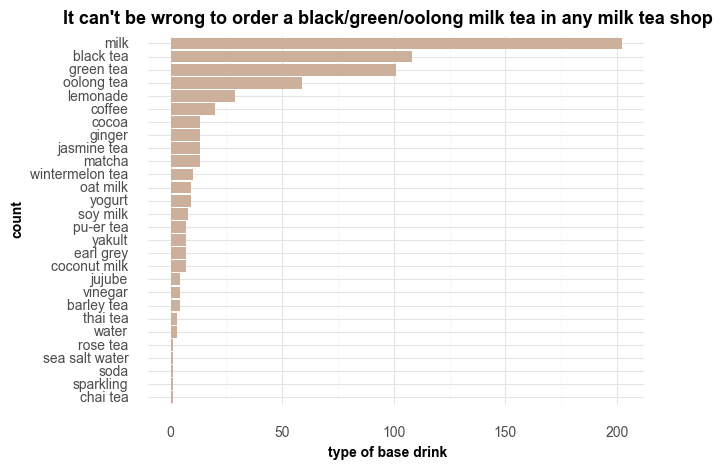

<ggplot: (318782121)>

In [242]:
p1 = (
    ggplot(bs_df)
    + aes(x='reorder(d_name, d_count)', y='d_count')
    + geom_bar(stat='identity',fill='#CDB09C')
    + labs(
            title = "It can't be wrong to order a black/green/oolong milk tea in any milk tea shop",
            x = "count",
            y = "type of base drink"
        )
    + coord_flip()
    + theme_minimal()
    + theme(
            text = element_text(family='Arial',size=10),
            axis_title = element_text(face='bold'),
            axis_text = element_text(size=10),
            plot_title = element_text(face='bold', size=13),
        )

)
display(p1)

In [243]:
p1.save('vis-2.png',dpi=1000)

/Users/angeline_jcq/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/angeline_jcq/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: vis-2.png


/Users/angeline_jcq/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


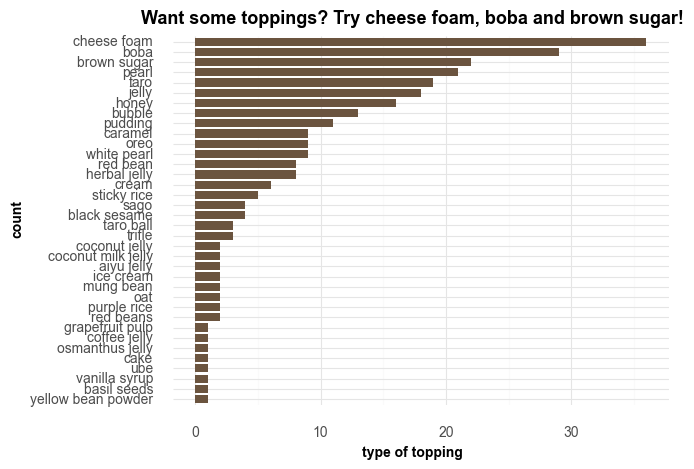

<ggplot: (319104636)>

In [244]:
p2 = (
    ggplot(t_df)
    + aes(x='reorder(t_name, t_count)', y='t_count')
    + geom_bar(stat='identity',fill='#6B543F',width=0.8)
    + labs(
            title = "Want some toppings? Try cheese foam, boba and brown sugar!",
            x = "count",
            y = "type of topping"
        )
    + scale_color_manual(values="#CDB09C")
    + coord_flip()
    + theme_minimal()
    + theme(
            text = element_text(family='Arial',size=10),
            axis_title = element_text(face='bold'),
            axis_text = element_text(size=10),
            plot_title = element_text(face='bold', size=13),
        )

)
display(p2)

In [245]:
p2.save('vis-3.png',dpi=1000)

/Users/angeline_jcq/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/angeline_jcq/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: vis-3.png
/Users/angeline_jcq/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


/Users/angeline_jcq/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


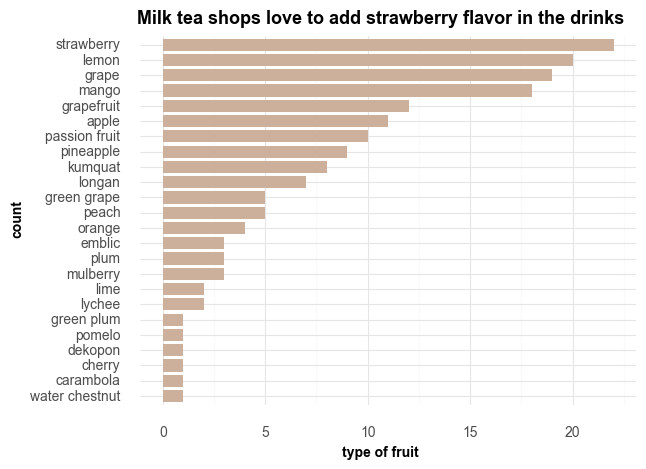

<ggplot: (318068164)>

In [246]:
without_berry = f_df[~f_df.f_name.isin(["berry"])]
p3 = (
    ggplot(without_berry)
    + aes(x='reorder(f_name, f_count)', y='f_count')
    + geom_bar(stat='identity',fill='#CDB09C',width=0.8)
    + labs(
            title = "Milk tea shops love to add strawberry flavor in the drinks",
            x = "count",
            y = "type of fruit"
        )
    + scale_color_manual(values="#CDB09C")
    + coord_flip()
    + theme_minimal()
    + theme(
            text = element_text(family='Arial',size=10),
            axis_title = element_text(face='bold'),
            axis_text = element_text(size=10),
            plot_title = element_text(face='bold', size=13),
        )

)
display(p3)

In [247]:
p3.save('vis-4.png',dpi=1000)

/Users/angeline_jcq/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/angeline_jcq/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: vis-4.png
/Users/angeline_jcq/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it
